In [6]:
import pandas as pd

#### Import Clean Dataset

In [154]:
from os.path import exists

if not exists("data/clean_dataset_googleplaystore.csv"):
    import play_store_data
    data_processing = play_store_data.PlayStoreData()
    data_processing.process_all()

df = pd.read_csv("data/clean_dataset_googleplaystore.csv")

df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genre Principal,Last Updated,Genre Secondaire
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159.0,19000000,10000,0.0,0,0,2018-01-07,0
1,Coloring book moana,0,3.9,967.0,14000000,500000,0.0,0,0,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510.0,8700000,5000000,0.0,0,0,2018-08-01,0
3,Sketch - Draw & Paint,0,4.5,215644.0,25000000,50000000,0.0,1,0,2018-06-08,0
4,Pixel Draw - Number Art Coloring Book,0,4.3,967.0,2800000,100000,0.0,0,0,2018-06-20,2
...,...,...,...,...,...,...,...,...,...,...,...
7724,Chemin (fr),3,4.8,44.0,619000,1000,0.0,0,3,2014-03-23,0
7725,FR Calculator,18,4.0,7.0,2600000,500,0.0,0,8,2017-06-18,0
7726,Sya9a Maroc - FR,18,4.5,38.0,53000000,5000,0.0,0,8,2017-07-25,0
7727,Fr. Mike Schmitz Audio Teachings,18,5.0,4.0,3600000,100,0.0,0,8,2018-07-06,0


In [155]:
# Normalisation
from sklearn import preprocessing

feature1 = "Installs"
feature2 = "Rating"

normalized_columns = [feature1, feature2]
df_normalized = pd.DataFrame(preprocessing.normalize(df[normalized_columns]), columns=normalized_columns)

df_normalized

,Installs,Rating
0,1.000000,4.100000e-04
1,1.000000,7.800000e-06
2,1.000000,9.400000e-07
3,1.000000,9.000000e-08
4,1.000000,4.300000e-05
...,...,...
7724,0.999988,4.799945e-03
7725,0.999968,7.999744e-03
7726,1.000000,8.999996e-04
7727,0.998752,4.993762e-02


c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

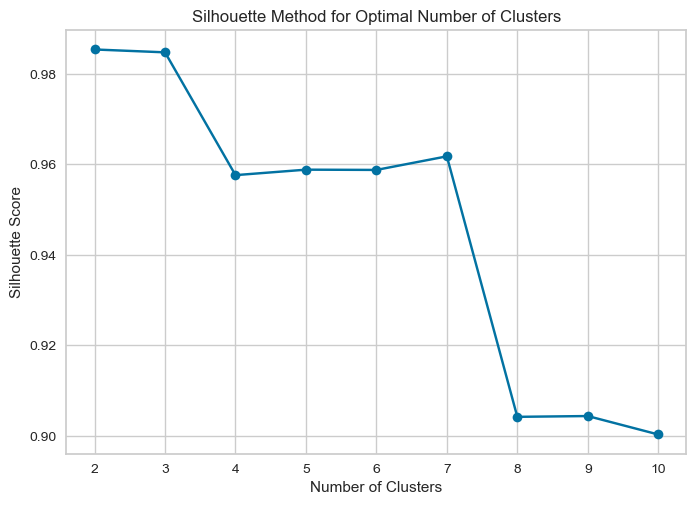

The optimal number of clusters is: 2


In [156]:
# Silhouette method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Choose the range of clusters you want to test
cluster_range = range(2, 11)

# Store the silhouette scores for each cluster size
silhouette_scores = []

for n_clusters in cluster_range:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_normalized[[feature1, feature2]])

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_normalized[[feature1, feature2]], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

print(f"The optimal number of clusters is: {optimal_clusters}")


c:\Users\ninor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


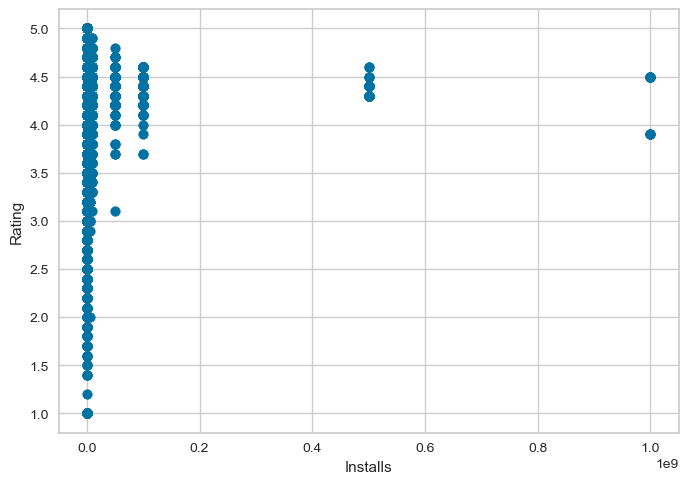

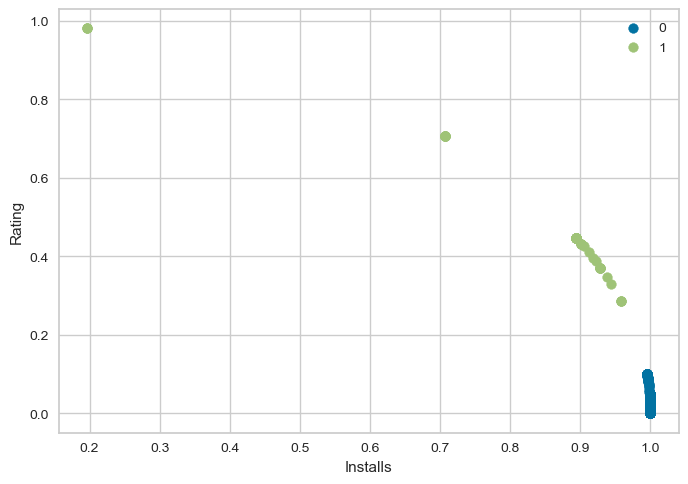

In [159]:
k = optimal_clusters

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(df_normalized[[feature1, feature2]])

#plotting original data
plt.scatter(df[feature1] , df[feature2])
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

#plotting the results:
for i in range (0, k):
    cluster_i = df_normalized[clusters == i]
    plt.scatter(cluster_i[feature1], cluster_i[feature2], label = i)
plt.legend()
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()